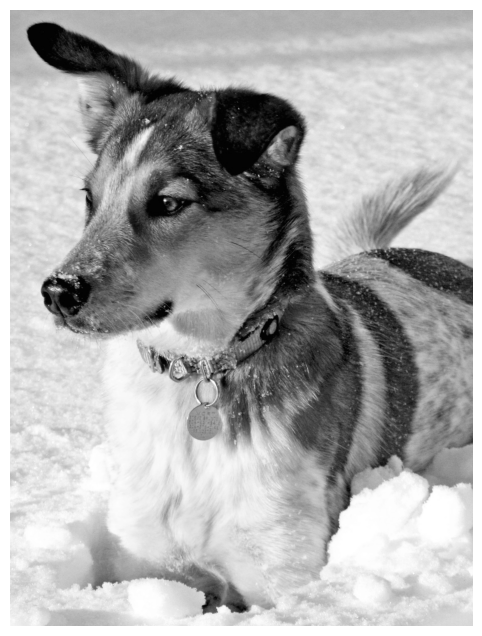

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('..','DATA','dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [3]:
U, S, VT = np.linalg.svd(X,full_matrices=True)
#dog.jpg is 2000*1500, thus n = 2000, m = 1500
r = 4 #choose rank = 4
U_r = U[:,:r]

U_r_T = U_r.T

print(U_r_T @ U_r)
print(U_r @ U_r_T)

[[ 1.00000000e+00  7.04731412e-17 -1.94289029e-16 -2.08166817e-16]
 [ 7.04731412e-17  1.00000000e+00  6.02816408e-17 -2.16840434e-16]
 [-1.94289029e-16  6.02816408e-17  1.00000000e+00  1.28369537e-16]
 [-2.08166817e-16 -2.16840434e-16  1.28369537e-16  1.00000000e+00]]
[[0.00075887 0.00075795 0.00075553 ... 0.0009868  0.00098688 0.00098711]
 [0.00075795 0.00075704 0.00075462 ... 0.00098583 0.0009859  0.00098612]
 [0.00075553 0.00075462 0.00075224 ... 0.00098357 0.00098369 0.00098394]
 ...
 [0.0009868  0.00098583 0.00098357 ... 0.0014469  0.00144789 0.00145095]
 [0.00098688 0.0009859  0.00098369 ... 0.00144789 0.00144894 0.00145203]
 [0.00098711 0.00098612 0.00098394 ... 0.00145095 0.00145203 0.00145517]]


In [4]:
Y_fro = []
#here, we use U instead of U_hat(economy type), so r could be larger than m, up to 2000
for r in range( 1,2001):
    U_r = U[:,:r]
    U_r_T = U_r.T
    Y_fro.append( np.linalg.norm(U_r @ U_r_T - np.identity(2000),'fro') )

X = np.linspace(1,2000,2000)

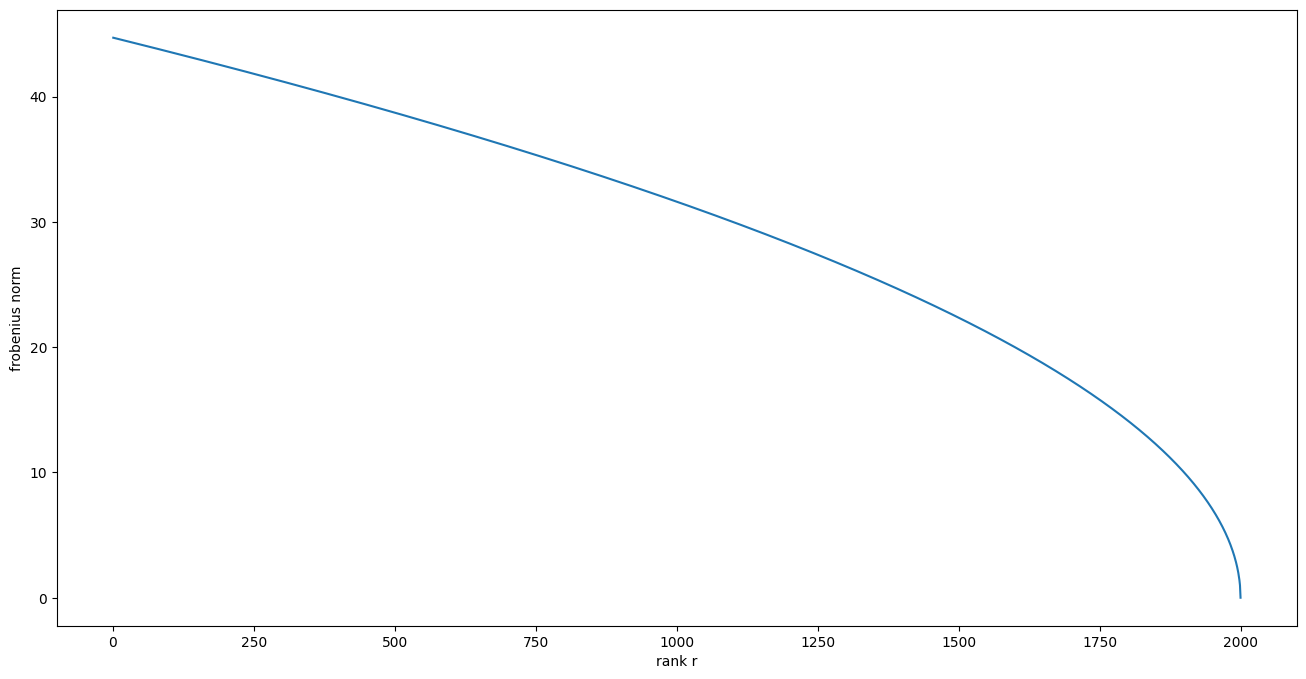

In [11]:
plt.plot(X,Y_fro)
plt.xlabel("rank r")
plt.ylabel("frobenius norm")
plt.show()